In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.dates as mdates
import datetime as dt
import mplfinance as mpf
import yfinance as yfin

# Loading data function

In [2]:
def save_to_csv(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    yfin.pdr_override()

    df = web.get_data_yahoo(ticker, start, end) # we overided with yfinance
    df.to_csv("/Users/rish/Finance/Project" + ticker + ".csv") # check if this works, do you need to add file path?

    return df

In [3]:
# Start of a financial year is july 1st
save_to_csv("AMZN", 2018, 7, 1, 2023, 4, 16)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,84.135002,85.694504,83.903000,85.689003,85.689003,63714000
2018-07-03,86.197998,86.250000,84.624001,84.697998,84.697998,43546000
2018-07-05,85.268997,85.534500,84.107498,84.986504,84.986504,59662000
2018-07-06,84.800003,85.763496,84.583504,85.531502,85.531502,53006000
2018-07-09,86.202499,86.977997,85.811501,86.950996,86.950996,60240000
...,...,...,...,...,...,...
2023-04-10,100.959999,102.199997,99.570000,102.169998,102.169998,37261200
2023-04-11,100.800003,101.000000,99.010002,99.919998,99.919998,60417800
2023-04-12,100.400002,100.510002,97.709999,97.830002,97.830002,56735000


In [4]:
data = pd.read_csv("AMZN.csv")

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-02,84.135002,85.694504,83.903000,85.689003,85.689003,63714000
1,2018-07-03,86.197998,86.250000,84.624001,84.697998,84.697998,43546000
2,2018-07-05,85.268997,85.534500,84.107498,84.986504,84.986504,59662000
3,2018-07-06,84.800003,85.763496,84.583504,85.531502,85.531502,53006000
4,2018-07-09,86.202499,86.977997,85.811501,86.950996,86.950996,60240000


In [8]:
amzn_df = pd.DataFrame(data[["Date", "Close"]])

In [9]:
amzn_df

,Date,Close
0,2018-07-02,85.689003
1,2018-07-03,84.697998
2,2018-07-05,84.986504
3,2018-07-06,85.531502
4,2018-07-09,86.950996
...,...,...
1200,2023-04-10,102.169998
1201,2023-04-11,99.919998
1202,2023-04-12,97.830002
1203,2023-04-13,102.400002


In [10]:
from datetime import datetime

timestamps = []
prices = []

for line in amzn_df:
    timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    prices.append(float(line[2]))

ValueError: time data 'a' does not match format '%Y-%m-%d'

In [11]:
for line in amzn_df:
    print(line)

Date
Close


In [16]:
amzn_data = pd.DataFrame(data["Close"]).rename(columns = {"Close":"Price"})

In [18]:
amzn_date_df = pd.DataFrame(data["Date"])

In [22]:
amzn_df = amzn_date_df.join(amzn_data)

<AxesSubplot:>

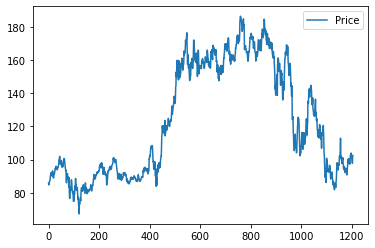

In [24]:
amzn_df.plot()

In [29]:
import csv
from datetime import datetime

timestamp = []
price = []
with open("/Users/rish/Finance/Project/AMZN.csv", 'r') as file:
    bitcoin_data = csv.reader(file)
    next(bitcoin_data)
    for line in bitcoin_data:
        timestamp.append(datetime.strptime(line[0], "%Y-%m-%d"))
        price.append(float(line[1]))


In [31]:
len(timestamp), len(price)

(1205, 1205)

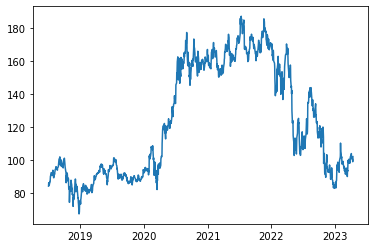

In [33]:
import matplotlib.pyplot as plt

plt.plot(timestamp, price)